<h2 style='color:blue' align='center'>Small Image Classification Using Convolutional Neural Network (CNN)</h2>

In this notebook, we will classify small images cifar10 dataset from tensorflow keras datasets. There are total 10 classes as shown below. We will use CNN for classification

<img src="small_images.jpg" />

**Deep learning Libs:** 

1. Tensorflow ( Google ) 
2. Pytorch  ( Facebook ) 
3. Keras
4. Caffe
.....

**We will be Using Tensroflow**

1. Easy to integrate
2. Could be converted to multiple formats ( tflite -to work on smartphones, tfjs )
3. Work in the background using C++ 
4. Open source, frequently updated by Google, Customizable


**Keras** <br>
an interface ( enable us to write simpler code ), work as an interface: tf, pytorch, CNTK 

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

<h4 style="color:purple">Load the dataset</h4>

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
32*32*3

3072

Here we see there are 50000 training images and 1000 test images

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [7]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
y_test = y_test.reshape(-1,)

In [9]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Let's plot some images to see what they are 

In [10]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

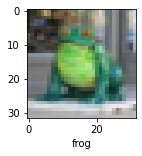

In [11]:
plot_sample(X_train, y_train, 19)

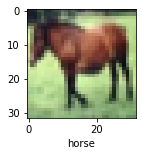

In [12]:
plot_sample(X_train, y_train, 7)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

<h4 style="color:purple">Normalizing the training data</h4>

In [12]:
X_train = X_train / 255.0
X_test = X_test / 255.0

<h4 style="color:purple">Build simple artificial neural network for image classification</h4>

In [13]:
32*32*3

3072

**Activation functions** 

1. sigmoid 
2. relu 
3. tanh 
4. softmax 
5. leaky relu  

Task 1: all types of activation function
<br> Task 2: when to use softmax ? 

Optimizer 

<br>
**Loss** <br>
called error function ( calculate error value ) 
<br>goal : loss ~= 0 

<br>
Differ from problem to another: 
<br>
1. binary classification                            
2. categorical  classification                                           
3. regression                                    
4. clustering                           

In [14]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(500, activation='relu'),
        layers.Dense(400, activation='relu'),
        layers.Dense(10, activation='sigmoid')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.9091 - accuracy: 0.3126
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7100 - accuracy: 0.3943
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6187 - accuracy: 0.4280
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5552 - accuracy: 0.4497
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5079 - accuracy: 0.4650
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4673 - accuracy: 0.4815
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4301 - accuracy: 0.4945
Epoch 8/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3976 - accuracy: 0.5063
Epoch 9/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3702 - accuracy: 0.5175
Epoch 10/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.344

**You can see that at the end of 5 epochs, accuracy is at around 48.48%**

In [15]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.4734 - accuracy: 0.4759


[1.4733848571777344, 0.47589999437332153]

In [16]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.45      0.67      0.54      1000
           1       0.52      0.63      0.57      1000
           2       0.37      0.41      0.39      1000
           3       0.40      0.12      0.18      1000
           4       0.53      0.29      0.37      1000
           5       0.39      0.44      0.41      1000
           6       0.54      0.57      0.56      1000
           7       0.62      0.49      0.55      1000
           8       0.74      0.42      0.53      1000
           9       0.40      0.71      0.51      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.46     10000
weighted avg       0.50      0.48      0.46     10000



<h4 style="color:purple">Now let us build a convolutional neural network to train our images</h4>

In [20]:
filtersize =20

In [18]:
# convolution neural network 
cnn = models.Sequential([
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

In [20]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.8061 - accuracy: 0.7203
Epoch 2/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.7634 - accuracy: 0.7351
Epoch 3/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.7261 - accuracy: 0.7479
Epoch 4/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.6881 - accuracy: 0.76090s - loss: 0
Epoch 5/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.6548 - accuracy: 0.7730
Epoch 6/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.6275 - accuracy: 0.7814
Epoch 7/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.5965 - accuracy: 0.7897
Epoch 8/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.5697 - accuracy: 0.8004
Epoch 9/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.5457 - accuracy: 0.8072
Epoch 10/10
1563/1563 [=============================

**With CNN, at the end 5 epochs, accuracy was at around 70.28% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features**

In [23]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.9926 - accuracy: 0.6959


[0.9926320314407349, 0.695900022983551]

In [17]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[2.07336114e-07, 2.34376643e-07, 3.74015804e-06, 1.18819773e-02,
        1.21963021e-05, 4.40716743e-04, 5.82605600e-04, 9.92430174e-08,
        2.79992819e-04, 2.50296495e-07],
       [1.33988261e-03, 1.79293752e-03, 5.97111480e-08, 4.99968422e-08,
        6.52275123e-10, 9.93571225e-10, 7.00066782e-10, 1.83712295e-10,
        2.43862271e-02, 5.02228737e-04],
       [8.59379768e-04, 2.07155943e-04, 1.70819931e-05, 3.04087062e-05,
        1.15899059e-06, 1.13470981e-06, 3.53342239e-06, 1.45151796e-06,
        3.14314067e-02, 1.67947073e-05],
       [1.93960667e-02, 6.20275736e-04, 6.25984467e-05, 4.17550691e-05,
        9.58890887e-05, 4.29572310e-07, 3.64030639e-05, 7.87483259e-06,
        4.11480665e-04, 2.05989236e-05],
       [2.44283118e-08, 2.43518798e-06, 1.14578009e-03, 1.09854341e-03,
        1.38368011e-02, 1.07421925e-04, 2.75087446e-01, 3.63854968e-09,
        3.74746094e-07, 2.70530753e-09]], dtype=float32)

In [24]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [25]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

TypeError: only integer scalar arrays can be converted to a scalar index

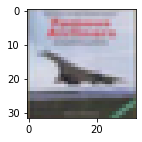

In [29]:
plot_sample(X_test, y_test,3)

In [27]:
classes[y_classes[3]]

'airplane'

In [28]:
classes[y_classes[3]]

'airplane'

<h3 style='color:purple'>Exercise</h3>

Use CNN to do handwritten digits classification using MNIST dataset. You can use this notebook as a reference:
https://github.com/codebasics/py/blob/master/DeepLearningML/1_digits_recognition/digits_recognition_neural_network.ipynb

Above we used ANN for digits classification. You need to modify this code to use CNN instead. Check how accuracy improves fast with CNN and figure out how CNN can be a better choice for doing image classification compared to ANN. Once you have worked on this problem on your own, you can check my solution by clicking on this link: [Solution](https://github.com/codebasics/py/blob/master/DeepLearningML/16_cnn_cifar10_small_image_classification/cnn_mnist_exercise_solution.ipynb)